## 3 Methods to do ANOVA in Python

In [5]:
import pandas as pd
%matplotlib inline
datafile = "PlantGrowth.csv"
data = pd.read_csv(datafile)
data

Unnamed: 0  weight group
0            1    4.17  ctrl
1            2    5.58  ctrl
2            3    5.18  ctrl
3            4    6.11  ctrl
4            5    4.50  ctrl
5            6    4.61  ctrl
6            7    5.17  ctrl
7            8    4.53  ctrl
8            9    5.33  ctrl
9           10    5.14  ctrl
10          11    4.81  trt1
11          12    4.17  trt1
12          13    4.41  trt1
13          14    3.59  trt1
14          15    5.87  trt1
15          16    3.83  trt1
16          17    6.03  trt1
17          18    4.89  trt1
18          19    4.32  trt1
19          20    4.69  trt1
20          21    6.31  trt2
21          22    5.12  trt2
22          23    5.54  trt2
23          24    5.50  trt2
24          25    5.37  trt2
25          26    5.29  trt2
26          27    4.92  trt2
27          28    6.15  trt2
28          29    5.80  trt2
29          30    5.26  trt2

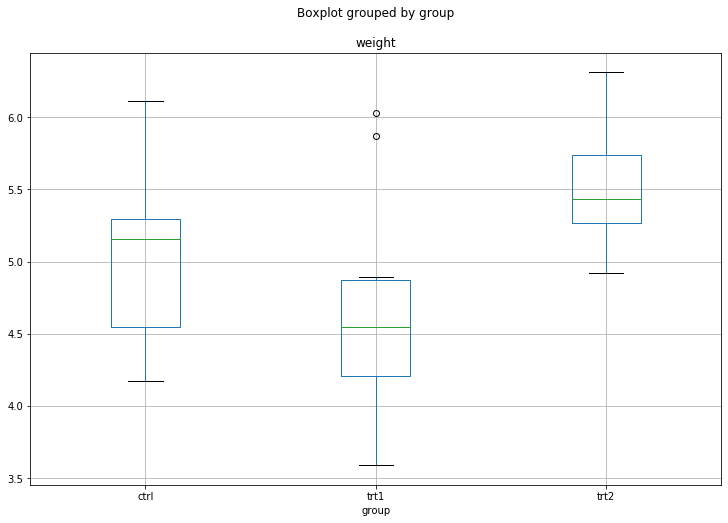

In [6]:
#Create a boxplot
data.boxplot('weight', by='group', figsize=(12, 8))

In [ ]:
ctrl = data['weight'][data.group == 'ctrl']

In [12]:
grps = pd.unique(data.group.values)
d_data = {grp:data['weight'][data.group == grp] for grp in grps}
d_data

{'ctrl': 0    4.17
 1    5.58
 2    5.18
 3    6.11
 4    4.50
 5    4.61
 6    5.17
 7    4.53
 8    5.33
 9    5.14
 Name: weight, dtype: float64, 'trt1': 10    4.81
 11    4.17
 12    4.41
 13    3.59
 14    5.87
 15    3.83
 16    6.03
 17    4.89
 18    4.32
 19    4.69
 Name: weight, dtype: float64, 'trt2': 20    6.31
 21    5.12
 22    5.54
 23    5.50
 24    5.37
 25    5.29
 26    4.92
 27    6.15
 28    5.80
 29    5.26
 Name: weight, dtype: float64}

In [18]:
k = len(pd.unique(data.group))  # number of conditions

N = len(data.values)  # conditions times participants

n = data.groupby('group').size()[0] #Participants in each condition

print (k, N, n)

3 30 10


## ANOVA in Python using SciPy

In [19]:
from scipy import stats

F, p = stats.f_oneway(d_data['ctrl'], d_data['trt1'], d_data['trt2'])

In [23]:
DFbetween = k - 1
DFwithin = N - k
DFtotal = N - 1

print('Degree of Freedom of Between, Within, Total: ', DFbetween, DFwithin, DFtotal)

Degree of Freedom of Between, Within, Total:  2 27 29


In [26]:
SSbetween = (sum(data.groupby('group').sum()['weight']**2)/n) - (data['weight'].sum()**2)/N
SSbetween

3.766340000000014

In [27]:
sum_y_squared = sum([value**2 for value in data['weight'].values])
SSwithin = sum_y_squared - sum(data.groupby('group').sum()['weight']**2)/n
SSwithin

10.492090000000076

In [28]:
SStotal = sum_y_squared - (data['weight'].sum()**2)/N
SStotal

14.25843000000009

In [29]:
MSbetween = SSbetween/DFbetween

In [30]:
MSwithin = SSwithin/DFwithin

In [31]:
F = MSbetween/MSwithin

In [32]:
p = stats.f.sf(F, DFbetween, DFwithin)

In [33]:
F, p

(4.846087862380118, 0.015909958325623124)

### ANOVA in Python using Statsmodels

In [34]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('weight ~ group',
                data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

            sum_sq    df         F   PR(>F)
group      3.76634   2.0  4.846088  0.01591
Residual  10.49209  27.0       NaN      NaN


### Python ANOVA: Pairwise Comparisons

In [35]:
pair_t = mod.t_test_pairwise('group')
pair_t.result_frame

coef   std err         t     P>|t|  Conf. Int. Low  \
trt1-ctrl -0.371  0.278782 -1.330791  0.194388       -0.943013   
trt2-ctrl  0.494  0.278782  1.771996  0.087682       -0.078013   
trt2-trt1  0.865  0.278782  3.102787  0.004459        0.292987   

           Conf. Int. Upp.  pvalue-hs  reject-hs  
trt1-ctrl         0.201013   0.194388      False  
trt2-ctrl         1.066013   0.167675      False  
trt2-trt1         1.437013   0.013318       True

### Python ANOVA using Pingouin

#### This package is, as with Statsmodels, very simple to use.

In [41]:
import pandas as pd
import pingouin as pg

data = "https://vincentarelbundock.github.io/Rdatasets/csv/datasets/PlantGrowth.csv"

df = pd.read_csv(data, index_col=0)

aov = pg.anova(data=df, dv='weight', between='group', detailed=True)
print(aov)

   Source        SS  DF        MS         F    p-unc       np2
0   group   3.76634   2  1.883170  4.846088  0.01591  0.264148
1  Within  10.49209  27  0.388596       NaN      NaN       NaN
